In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plotline(w,b,xmin=-100.,xmax=100.,label=""):
    xsamples = np.array([xmin, xmax])
    plt.plot(xsamples, [w*x+b for x in xsamples], color="black", label=label)
    plt.legend()

In [3]:
"""plot function y=f(x)"""
def plotfunc(f, xmin=-100,xmax=100,nsamples=100,label=""):
    xsamples = np.linspace(xmin,xmax,nsamples)
    plt.plot(xsamples, [f(x) for x in xsamples], color="black", label=label)

In [6]:
# Generate and plot data
np.random.seed(2) # seed generator
n = 20
def sample_data(num_points):
    x = np.random.rand(num_points)*10
    y = .2 + .2*x + .1*np.sin(x) + .03*np.random.randn(num_points) - .1*(x/6)**2
    return x,y

x,y = sample_data(n)

"""function to plot the above data"""
def plotdata(x=x,y=y,margin=.05):
    plt.scatter(x,y, label="data")
    plt.xlabel("x")
    plt.ylabel("y")
    range_y = np.max(y) - np.min(y)
    range_x = np.max(x) - np.min(x)
    plt.ylim((np.min(y)-margin*range_y,np.max(y)+margin*range_y))
    plt.xlim((np.min(x)-margin*range_x,np.max(x)+margin*range_x))
    plt.legend()

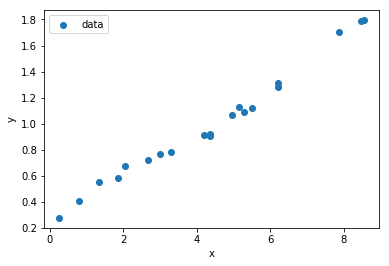

In [7]:
plotdata()
plt.show()

# Approximating with the mean

In [8]:
# the mean solves a very simple least squares problem:
X = np.ones([n,1]) # 2-dimension
w,resid,rank,s = np.linalg.lstsq(X,y)

In [9]:
# check the solution to our least squares problem is the mean
np.abs(np.mean(y) - w[0])

0.0

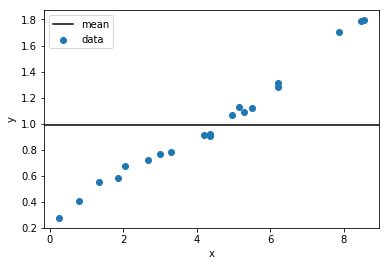

In [12]:
# plot the fit
plt.clf()
plotdata()
plotline(0, w[0], label="mean")
plt.show()

# Approximating with a line

In [22]:
X = np.vstack((x,np.ones(len(x)))).T # vertically stack and then transpose
X

array([[ 4.35994902,  1.        ],
       [ 0.25926232,  1.        ],
       [ 5.49662478,  1.        ],
       [ 4.35322393,  1.        ],
       [ 4.20367802,  1.        ],
       [ 3.30334821,  1.        ],
       [ 2.04648634,  1.        ],
       [ 6.19270966,  1.        ],
       [ 2.99654674,  1.        ],
       [ 2.66827275,  1.        ],
       [ 6.21133833,  1.        ],
       [ 5.29142094,  1.        ],
       [ 1.34579945,  1.        ],
       [ 5.13578121,  1.        ],
       [ 1.84439866,  1.        ],
       [ 7.85335148,  1.        ],
       [ 8.53975293,  1.        ],
       [ 4.94236837,  1.        ],
       [ 8.46561485,  1.        ],
       [ 0.79645477,  1.        ]])

In [23]:
w,resid,rank,s = np.linalg.lstsq(X,y)
w

array([ 0.1753625 ,  0.23323072])

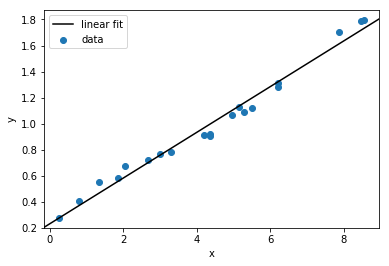

In [18]:
# plot the fit
plt.clf()
plotdata()
plotline(w[0], w[1], label="linear fit")
plt.show()

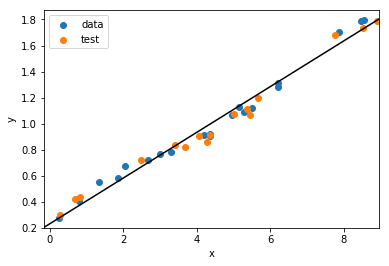

In [20]:
# plot fit on out of sample data
plt.clf()
plotdata()
plotline(w[0], w[1])

xtest,ytest = sample_data(20)
plt.scatter(xtest,ytest,label="test")
plt.legend()
plt.show()

# Approximating with a polynomial

In [24]:
# first, construct a Vandermonde matrix
max_order = 10

X = np.zeros((n, max_order+1))
for k in range(max_order+1):
    X[:,k] = x**k

X

array([[  1.00000000e+00,   4.35994902e+00,   1.90091555e+01,
          8.28789488e+01,   3.61347992e+02,   1.57545882e+03,
          6.86892015e+03,   2.99481417e+04,   1.30572371e+05,
          5.69288881e+05,   2.48207050e+06],
       [  1.00000000e+00,   2.59262318e-01,   6.72169497e-02,
          1.74268222e-02,   4.51811832e-03,   1.17137783e-03,
          3.03694132e-04,   7.87364447e-05,   2.04133932e-05,
          5.29242364e-06,   1.37212602e-06],
       [  1.00000000e+00,   5.49662478e+00,   3.02128840e+01,
          1.66068887e+02,   9.12818357e+02,   5.01742000e+03,
          2.75788751e+04,   1.51590728e+05,   8.33237353e+05,
          4.57999308e+06,   2.51745035e+07],
       [  1.00000000e+00,   4.35322393e+00,   1.89505586e+01,
          8.24960249e+01,   3.59123669e+02,   1.56334575e+03,
          6.80559412e+03,   2.96262752e+04,   1.28969810e+05,
          5.61434462e+05,   2.44404993e+06],
       [  1.00000000e+00,   4.20367802e+00,   1.76709089e+01,
          7.42

In [25]:
# solve least squares problem
w,resid,rank,s = np.linalg.lstsq(X,y)
w

array([  2.95410206e-01,  -3.39692318e-01,   1.38047814e+00,
        -1.56091825e+00,   9.94957659e-01,  -3.94653732e-01,
         9.99915251e-02,  -1.60902078e-02,   1.58533552e-03,
        -8.70219066e-05,   2.03536804e-06])

In [27]:
"""computes our polynomial fit evaluated at x"""
def p(x, order = max_order, w = w):
    y = 0
    for k in range(order+1):
        y += w[k]*x**k
    return y

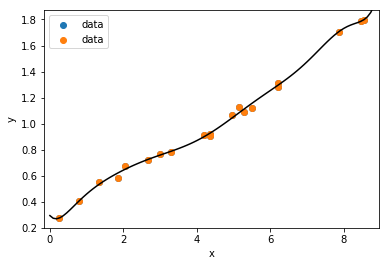

In [28]:
# plot fit
plotdata()
plotfunc(p, xmin=0, xmax=9)
plt.show()

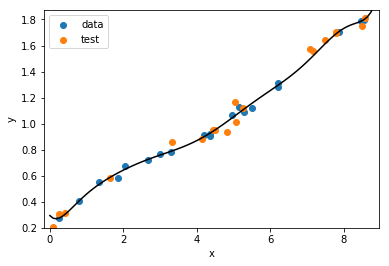

In [31]:
# plot fit on out of sample data
plt.clf()
plotdata()
plotfunc(p, xmin=0, xmax=9)

xtest,ytest = sample_data(20)
plt.scatter(xtest,ytest,label="test")
plt.legend()
plt.show()

# Choosing the best model order

In [34]:
max_model_order = 10
rmse = np.empty(max_model_order+1) # array to store root mean square model errors
xtest,ytest = sample_data(50) # generate test set

for model_order in range(max_model_order+1):
    # form Vandermonde matrix
    X = np.zeros((n, model_order+1))
    for k in range(model_order+1):
        X[:,k] = x**k
    
    # solve least squares problem
    w,resid,rank,s = np.linalg.lstsq(X,y)
    
    # compute test error
    ptest = [p(x, order=model_order, w=w) for x in xtest]
    rmse[model_order] = np.sqrt(np.mean((ytest - ptest)**2))

F:\install\anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


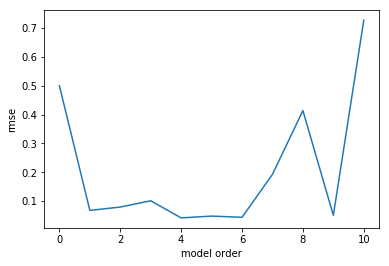

In [35]:
plt.plot(rmse)
plt.xlabel("model order")
plt.ylabel("rmse")
plt.legend()
plt.show()

#  Bootstrap estimators

In [36]:
# sample K data sets of n samples each and compute a model on each
# see how the models vary
n = 20
K = 10

models = np.zeros((K,2))
for k in range(K):
    xk,yk = sample_data(n)
    Xk = np.vstack((xk,np.ones(n))).T
    wk,resid,rank,s = np.linalg.lstsq(Xk,yk)
    models[k,:] = wk

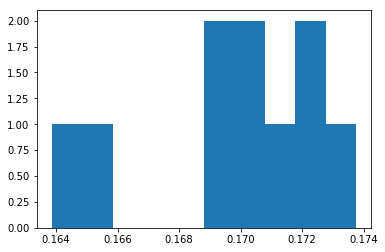

In [37]:
# histogram of the distribution of the first coefficient
# could use to compute, eg, confidence intervals
plt.hist(models[:,0])
plt.show()

In [38]:
np.mean(models,0)

array([ 0.16995677,  0.26448875])

In [39]:
np.var(models,0)

array([  8.61383559e-06,   2.06560997e-04])

In [40]:
# can sample with replacement using rand
np.random.choice(np.arange(1,15+1,1), size=5, replace=True)

# eg,
a = np.linspace(0.1, 1.5, num=15, endpoint=True)
s = np.random.choice(np.arange(1,15+1,1), size=5, replace=True)
np.vstack((s,a[s])).T

array([[ 12. ,   1.3],
       [  6. ,   0.7],
       [  2. ,   0.3],
       [ 12. ,   1.3],
       [ 12. ,   1.3]])

In [41]:
# resample K bootstrap data sets of n samples each and compute a model on each
# see how the models vary
n = 20
K = 100

x,y = sample_data(n)

models = np.zeros((K,2))
for k in range(K):
    mysample = np.random.choice(np.arange(0,n,1), size=n, replace=True)
    xk,yk = x[mysample], y[mysample]
    Xk = np.vstack((xk,np.ones(n))).T
    wk,resid,rank,s = np.linalg.lstsq(Xk,yk)
    models[k,:] = wk

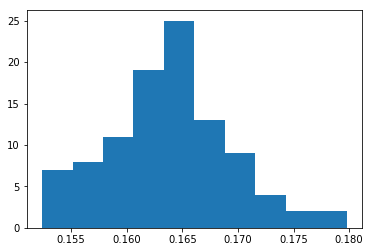

In [42]:
plt.hist(models[:,0])
plt.show()

In [43]:
np.mean(models,0)

array([ 0.16390832,  0.29541383])

In [44]:
# as K increases, mean of the bootstrap models should converge to 
# the model fit on the original data set
X = np.vstack((x,np.ones(len(x)))).T

w,resid,rank,s = np.linalg.lstsq(X,y)
w

array([ 0.16368689,  0.29622352])

In [45]:
np.var(models,0)

array([  3.04686815e-05,   1.08031166e-03])